# Descriptive analysis of local transportation


This is Exploratory Descriptive Analisys of expendure with local transportation. So we will create three notebook to explore the data of the follows subquotas: 'Taxi, toll and parking', 'Automotive vehicle renting or charter' and 'Fuels and lubricants'. We basically used the same analysis used by Irio in his descriptive analysis of all dataset in https://github.com/datasciencebr/serenata-de-amor/blob/master/develop/2016-08-13-irio-descriptive-analysis.ipynb

The anlisys of others subquota ara in:

'Automotive vehicle renting or charter': work in progress

'Fuels and lubricants': work in progress

### This first notebook is about subquota 'Taxi, toll and parking'

Importing the dataset

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [30]:
data = pd.read_csv('../data/2017-03-14-reimbursements.xz',
                   parse_dates=[16],
                   low_memory=False,
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str,})

All reimbursement of subquota 'Taxi, toll and parking' will be set in **data_taxi** variable, this is the main data who we will will use in this notebook.

In [31]:
data_taxi = data[data['subquota_description'] == 'Taxi, toll and parking']

Since 2013 was 70.088 documents of reimbursement.

In [32]:
print(data_taxi.shape)

(70088, 31)


In [33]:
data_taxi.head()

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
787345,2013,1001,5279620,NaN,462.98,4455,DILCEU SPERAFICO,73768,444,2015.0,...,2013-11-21T00:00:00,462.98,0.0,462.98,11,0,NaN,NaN,1074463,NaN
787413,2013,1001,5322894,NaN,463.48,4530,DILCEU SPERAFICO,73768,444,2015.0,...,2013-12-23T00:00:00,463.48,0.0,463.48,12,0,NaN,NaN,1086947,NaN
788066,2013,1003,5284413,NaN,80.00,4460,DOMINGOS DUTRA,74197,72,2011.0,...,2013-11-25T00:00:00,80.00,0.0,80.00,11,0,NaN,NaN,1075791,NaN
788102,2013,1003,5292845,NaN,46.00,4465,DOMINGOS DUTRA,74197,72,2011.0,...,2013-12-02T00:00:00,46.00,0.0,46.00,12,0,NaN,NaN,1078244,NaN
789539,2013,1006,5286676,NaN,18.00,4461,EDINHO ARAÚJO,73447,344,2015.0,...,2013-12-02T00:00:00,18.00,0.0,18.00,12,0,NaN,NaN,1076442,NaN


In [34]:
data_taxi.iloc[0]

year                                            2013
applicant_id                                    1001
document_id                                  5279620
reimbursement_value_total                        NaN
total_net_value                               462.98
reimbursement_numbers                           4455
congressperson_name                 DILCEU SPERAFICO
congressperson_id                              73768
congressperson_document                          444
term                                            2015
state                                             PR
party                                             PP
term_id                                           55
subquota_number                                  122
subquota_description          Taxi, toll and parking
subquota_group_id                                  0
subquota_group_description                       nan
supplier                       VIA FACIL - SEM PARAR
cnpj_cpf                              04088208

All the expedures sums more than **R$2.2 Million**

In [36]:
data_taxi['net_values'].sum()

2224660.8799999999

In [37]:
data_taxi['net_values'].describe()

count    70088.000000
mean        31.740967
std         88.476322
min          0.300000
25%          5.500000
50%         10.300000
75%         26.000000
max       2500.000000
Name: net_values, dtype: float64

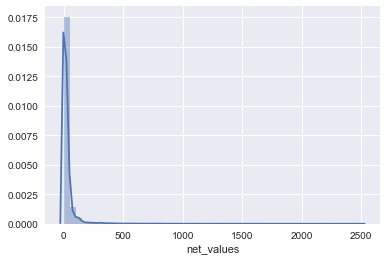

In [38]:
sns.distplot(data_taxi['net_values'])

The most expensive reimbursement was **R$2.500**

In [39]:
most_expensive_reimbursement = \
    data_taxi[data_taxi['net_values'] == data_taxi['net_values'].max()].iloc[0]
most_expensive_reimbursement

year                                                            2014
applicant_id                                                    1167
document_id                                                  5563397
reimbursement_value_total                                        NaN
total_net_value                                                 2500
reimbursement_numbers                                           4850
congressperson_name                                SALVADOR ZIMBALDI
congressperson_id                                              73559
congressperson_document                                          391
term                                                            2011
state                                                             SP
party                                                           PROS
term_id                                                           54
subquota_number                                                  122
subquota_description              

Here we considered outliers all 0,5% biggest reimbursement values. We found 350 outliers in a total of R$338,060.46.

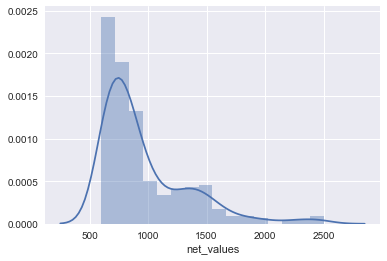

In [71]:
data_taxi = data_taxi.sort_values('net_values', ascending=False)
outliers = data_taxi.head(math.floor(len(data_taxi)*0.005))
sns.distplot(outliers['net_values'])

In [73]:
len(outliers)

350

In [74]:
outliers['net_values'].sum()

338060.45999999996

In [75]:
outliers

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
1036569,2014,1815,5533245,NaN,2500.00,4808,DR. UBIALI,141498,541,2011.0,...,2014-09-18T00:00:00,2823.86,323.86,2500.00,9,0,NaN,NaN,1146085,NaN
993866,2014,1167,5563397,NaN,2500.00,4850,SALVADOR ZIMBALDI,73559,391,2011.0,...,2014-09-23T00:00:00,3206.20,706.20,2500.00,9,0,NaN,NaN,1155664,NaN
1497821,2016,3013,5972150,NaN,2413.85,5418,MARCELO SQUASSONI,118594,369,2015.0,...,2016-03-31T00:00:00,2413.85,0.00,2413.85,3,0,NaN,NaN,1282605,NaN
1483507,2016,2973,6051588,NaN,2400.00,5512,JOAQUIM PASSARINHO,178910,33,2015.0,...,2016-06-20T00:00:00,2400.00,0.00,2400.00,7,0,NaN,NaN,1307898,NaN
1497918,2016,3013,6095827,NaN,2317.56,5546,MARCELO SQUASSONI,118594,369,2015.0,...,2016-07-30T00:00:00,2317.56,0.00,2317.56,7,0,NaN,NaN,1321471,NaN
1497919,2016,3013,6095852,NaN,2305.90,5547,MARCELO SQUASSONI,118594,369,2015.0,...,2016-08-30T00:00:00,2305.90,0.00,2305.90,8,0,NaN,NaN,1321481,NaN
1413679,2016,1947,6101806,NaN,2203.74,5554,VANDERLEI MACRIS,141553,394,2015.0,...,2016-09-17T00:00:00,2203.74,0.00,2203.74,9,0,NaN,NaN,1323386,NaN
1459941,2016,2895,5981974,NaN,2173.19,5435,VALMIR PRASCIDELLI,113247,393,2015.0,...,2016-04-08T00:00:00,2173.19,0.00,2173.19,4,0,NaN,NaN,1285617,NaN
1497876,2016,3013,6037369,NaN,2002.41,5490,MARCELO SQUASSONI,118594,369,2015.0,...,2016-05-31T00:00:00,2002.41,0.00,2002.41,5,0,NaN,NaN,1303026,NaN
1413585,2016,1947,6077062,NaN,1986.91,5529,VANDERLEI MACRIS,141553,394,2015.0,...,2016-08-17T00:00:00,1986.91,0.00,1986.91,8,0,NaN,NaN,1315693,NaN


## Who are these applicants?

In total 509 congressperson ask by reimbursement and most of them (75%) received R$5,364.90. 

But some congresperson received more them R$50.000,00 in the same perriod.

In [77]:
len(data_taxi['applicant_id'].unique())

509

In [78]:
applicants_by_net_value = \
    pd.DataFrame(data_taxi.groupby(['applicant_id'], as_index=False).sum()[['applicant_id', 'net_values']])

In [79]:
congressperson_list = data_taxi[
    ['applicant_id', 'congressperson_name', 'party', 'state']]
congressperson_list = congressperson_list. \
    drop_duplicates('applicant_id', keep='first')
ranking = pd.merge(applicants_by_net_value,
                   congressperson_list,
                   how='left',
                   on='applicant_id').sort_values('net_values', ascending=False)
ranking.head(10)

,applicant_id,net_values,congressperson_name,party,state
215,2238,53715.68,ZECA DIRCEU,PT,PR
217,2240,47110.69,ALESSANDRO MOLON,REDE,RJ
162,1854,45732.20,JÔ MORAES,PCdoB,MG
185,1947,41641.57,VANDERLEI MACRIS,PSDB,SP
308,2409,41414.50,NELSON MARCHEZAN JUNIOR,PSDB,RS
145,1799,32989.44,CHICO D'ANGELO,PT,RJ
321,2437,31355.95,MAGDA MOFATTO,PR,GO
464,3043,28171.36,DIEGO GARCIA,PHS,PR
233,2268,26985.88,NEWTON LIMA,PT,SP
358,2887,26589.28,DR. SINVAL MALHEIROS,PTN,SP


In [80]:
ranking['net_values'].describe()

count      509.000000
mean      4370.650059
std       7104.358064
min          2.500000
25%        322.500000
50%       1492.000000
75%       5364.900000
max      53715.680000
Name: net_values, dtype: float64

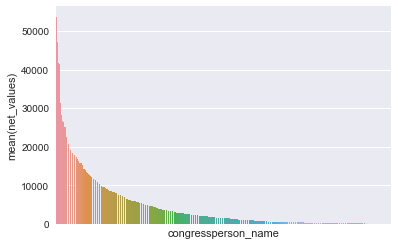

In [81]:
graph = sns.barplot(x='congressperson_name',
                    y='net_values',
                    data=ranking)
graph.axes.get_xaxis().set_ticks([]); None

# Suppliers

There are 1.797 suppliers, two of them are more than R$480.000. They are SINPETAXI, syndicate of taxi from Brasilia and CENTRO DE GESTAO DE MEIOS DE PAGAMENTO S.A., owner of SEM PARAR, company of payment of toll.

In [83]:
suppliers_list = pd.DataFrame(data_taxi.groupby(['cnpj_cpf'], as_index=False)['net_values'].sum())
suppliers_list = suppliers_list.sort_values('net_values', ascending=False)
suppliers_list

,cnpj_cpf,net_values
2,00031708000100,521118.19
402,04088208000165,487818.29
672,07424109000103,45667.10
1394,37990298000134,41582.23
1476,52378239000101,39189.57
251,02451848000162,37425.90
995,12623662000105,37156.15
1588,60537263089981,33757.50
1401,38069159000135,32617.62
4,00031708000371,30692.50


In [84]:
suppliers_list['net_values'].describe()

count      1797.000000
mean       1234.805965
std       17086.954787
min           1.100000
25%          20.000000
50%          52.000000
75%         181.000000
max      521118.190000
Name: net_values, dtype: float64

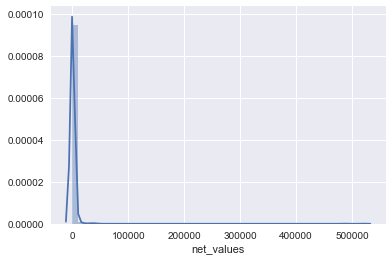

In [52]:
sns.distplot(suppliers_list['net_values'])

Here we considered outliers all 1% biggest suppliers. We found 17 outliers in a total of R$1.439.806.92

R$1.008.936,47 from SINPETAXI and SEM PARAR

R$430.870,44 from other companies

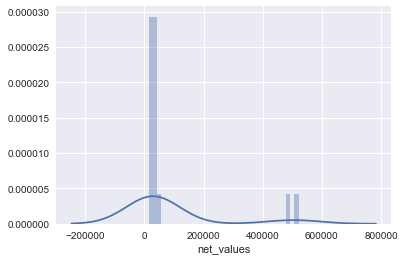

In [102]:
outliers_suppliers = suppliers_list.head(math.floor(len(suppliers_list)*0.01))
sns.distplot(outliers_suppliers['net_values'])

In [103]:
outliers_suppliers['net_values'].describe()

count        17.000000
mean      84694.525294
std      158404.535386
min       15000.000000
25%       20797.000000
50%       32617.620000
75%       39189.570000
max      521118.190000
Name: net_values, dtype: float64

In [104]:
outliers_suppliers['net_values'].sum()

1439806.9299999997

In [106]:
outliers_suppliers['net_values'].head(2).sum()

1008936.4799999999

In [108]:
outliers_suppliers['net_values'].tail(len(outliers_suppliers)-2).sum()

430870.44999999984

In [54]:
outliers_suppliers = suppliers_list[~suppliers_list.isin(data_wo_outliers_suppliers)['cnpj_cpf']]
print(len(outliers_suppliers), len(outliers_suppliers) / len(suppliers_list))

2 0.0011129660545353367


# Conclusion and next steps

We could note there a long tail in the reimbursements, there a group of congresspeople who expend much more then others. We could observe too, two big suppliers, a taxi syndicate from Brasilia and a company of payment of toll. The sugestion of next stepes are:
- split data of taxi, parking and toll.
- check the expenses in the time (by year, month and day)
- cross the data of "Taxi, toll and parking" with 'Automotive vehicle renting or charter' and 'Fuels and lubricants'